# WeatherPy

>Conclusions <br>
>1.- There is a high correlation between the latitude and a city temperature on the southern hemisphere. This means that the closer to the Ecuador the hotter it will be. <br>
>2.- There is no correlation between the latitude and the humidity and cloudiness on the cities. The rvalues on both hemispheres are closer to 0. <br>
>3.- About the wind speed, almost all the values gotten for this analysis are lower than 20 meter/sec (default value on the OpenWeather Api). Could be the season we are obtaining and it the correlationc could change throughout other seasons in the year.  <br>
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
#I had a ModuleError here until I figure out they have to be on the same folder 
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Based on one query, I checked the key values 
# query = query_url + "London"
# response_json = requests.get(query).json()
    
# city = response_json["name"]
# lng = response_json["coord"]["lon"]
# lat = response_json["coord"]["lat"]
# max_temp = response_json["main"]["temp_max"]
# humidity = response_json["main"]["humidity"]
# cloudiness = response_json["clouds"]["all"]
# wind_speed = response_json["wind"]["speed"]
# country = response_json["sys"]["country"]
# date = response_json["dt"]

# print(f"Info on each city:{city}, {city},{lng},{lat},{max_temp},{humidity},{cloudiness},{wind_speed},{country}, {date} ")


In [4]:
#QUERY URL 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
#empty lists for all my city values 

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Printing message values 
set_count = 1
city_count = 0 


print("Beginning Data Retrieval\n-------------------------")

#Loop through each city
for search in cities:
    
    # Create search query, make request and store in json
    query = query_url + search
    response = requests.get(query)
    response_json = response.json()
    
    # Getting all the data from the cities the API can find 
    try:
        city_count += 1
        city.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
        print(f"Processing Record {city_count} of Set {set_count}| {search} ")

        
    # Handle exceptions for cities not found 
    except KeyError: 
        print("City not found. Skipping...")
    
    #On the starter book, every set has 50 api calls. 
    #Indicating the set number and reseting the city count to 1. 
    #Because of the import time, setting sleep to pause between city sets. 
    if city_count > 50: 
        set_count +=1
        city_count = 0 
        time.sleep(5)   
    
print("--------------------------\nData Retrieval Complete\n-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1| mataura 
Processing Record 2 of Set 1| saint-francois 
Processing Record 3 of Set 1| barrow 
Processing Record 4 of Set 1| ampanihy 
City not found. Skipping...
Processing Record 6 of Set 1| bambous virieux 
Processing Record 7 of Set 1| dongsheng 
Processing Record 8 of Set 1| hermanus 
Processing Record 9 of Set 1| rikitea 
Processing Record 10 of Set 1| clyde river 
Processing Record 11 of Set 1| airai 
Processing Record 12 of Set 1| chinsali 
Processing Record 13 of Set 1| isangel 
Processing Record 14 of Set 1| beisfjord 
Processing Record 15 of Set 1| seredka 
Processing Record 16 of Set 1| yulara 
Processing Record 17 of Set 1| hithadhoo 
Processing Record 18 of Set 1| akcaabat 
Processing Record 19 of Set 1| bonthe 
Processing Record 20 of Set 1| punta arenas 
City not found. Skipping...
Processing Record 22 of Set 1| albany 
Processing Record 23 of Set 1| atuona 
Processing Record 24 of Set 1| mag

Processing Record 50 of Set 4| santa marta 
Processing Record 51 of Set 4| careiro da varzea 
Processing Record 1 of Set 5| alyangula 
City not found. Skipping...
Processing Record 3 of Set 5| arman 
Processing Record 4 of Set 5| vao 
Processing Record 5 of Set 5| bathsheba 
Processing Record 6 of Set 5| yumen 
Processing Record 7 of Set 5| dinuba 
Processing Record 8 of Set 5| pierre 
Processing Record 9 of Set 5| kaitangata 
Processing Record 10 of Set 5| trelew 
Processing Record 11 of Set 5| ankang 
Processing Record 12 of Set 5| berlevag 
Processing Record 13 of Set 5| nantucket 
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 5| londoko 
Processing Record 17 of Set 5| novaya lyalya 
Processing Record 18 of Set 5| carndonagh 
Processing Record 19 of Set 5| zhigansk 
City not found. Skipping...
Processing Record 21 of Set 5| lubango 
Processing Record 22 of Set 5| juegang 
Processing Record 23 of Set 5| te anau 
Processing Record 24 of Set 5| nuu

Processing Record 51 of Set 8| kulevcha 
Processing Record 1 of Set 9| salalah 
Processing Record 2 of Set 9| marienburg 
Processing Record 3 of Set 9| puga 
Processing Record 4 of Set 9| yazoo city 
Processing Record 5 of Set 9| whitehorse 
Processing Record 6 of Set 9| villa de reyes 
Processing Record 7 of Set 9| souris 
Processing Record 8 of Set 9| olinda 
Processing Record 9 of Set 9| basoko 
Processing Record 10 of Set 9| carbonia 
Processing Record 11 of Set 9| nuevo progreso 
Processing Record 12 of Set 9| sept-iles 
Processing Record 13 of Set 9| luderitz 
Processing Record 14 of Set 9| cockburn town 
Processing Record 15 of Set 9| malibu 
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 9| akdepe 
City not found. Skipping...
Processing Record 20 of Set 9| furth im wald 
Processing Record 21 of Set 9| vetluzhskiy 
Processing Record 22 of Set 9| khandyga 
Processing Record 23 of Set 9| katsuura 
Processing Record 24 of Set 9| ahuimanu 
Proces

Processing Record 49 of Set 12| xinqing 
Processing Record 50 of Set 12| shush 
Processing Record 51 of Set 12| kavaratti 
Processing Record 1 of Set 13| vostok 
Processing Record 2 of Set 13| khetia 
Processing Record 3 of Set 13| bilibino 
Processing Record 4 of Set 13| yurimaguas 
Processing Record 5 of Set 13| catia la mar 
Processing Record 6 of Set 13| sakakah 
City not found. Skipping...
Processing Record 8 of Set 13| semaria 
Processing Record 9 of Set 13| kahului 
Processing Record 10 of Set 13| zirandaro 
Processing Record 11 of Set 13| san cristobal 
Processing Record 12 of Set 13| inuvik 
City not found. Skipping...
Processing Record 14 of Set 13| tiarei 
--------------------------
Data Retrieval Complete
-------------------------


In [6]:
#Checking how many cities were found 
len(city)

578

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create Data Frame 

cities_complete = pd.DataFrame({"City": city,
                                "Lat": lat,
                                "Lng": lng,
                                "Max Temp": max_temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Wind Speed": wind_speed,
                                "Country": country, 
                                "Date": date, 
})

cities_complete

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,55.99,79,100,13.00,NZ,1619581507
1,Saint-François,46.4154,3.9054,50.00,93,100,3.44,FR,1619581508
2,Barrow,71.2906,-156.7887,19.40,86,90,3.44,US,1619581508
3,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508
4,Bambous Virieux,-20.3428,57.7575,75.20,94,75,18.41,MU,1619581509
...,...,...,...,...,...,...,...,...,...
573,Kahului,20.8947,-156.4700,80.60,61,40,11.50,US,1619581830
574,Zirándaro de los Chávez,18.4500,-100.9833,86.99,34,0,4.45,MX,1619581831
575,San Cristobal,7.7669,-72.2250,66.45,96,98,1.83,VE,1619581816
576,Inuvik,68.3499,-133.7218,30.20,34,5,4.61,CA,1619581832


In [8]:
#Save output to CSV 
cities_complete.to_csv("../output/citiesComplete.csv", index=False, header=True)

In [9]:
cities_complete.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,22.684666,17.467495,60.125554,70.269896,55.603806,7.276332,1.619582e+09
std,32.986057,90.181562,19.307084,22.699373,38.855246,4.700918,1.099724e+02
min,-54.800000,-175.200000,14.000000,4.000000,0.000000,0.290000,1.619581e+09
25%,-3.729775,-63.836300,43.792500,60.000000,18.000000,3.560000,1.619582e+09
50%,28.845800,24.258350,61.920000,75.500000,69.500000,6.310000,1.619582e+09
75%,49.827725,94.945200,75.615000,88.000000,94.000000,9.807500,1.619582e+09
max,78.218600,179.316700,103.100000,100.000000,100.000000,30.000000,1.619582e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#Checking if I have values over 100% in the Humidity column. 
#I have none, so I'll skip a .loc to filter my dataFrame. 
humidity = cities_complete["Humidity"].tolist()
humidity.sort(reverse=True)


#I print it and reviewed that I had no values over 100%. 
#humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

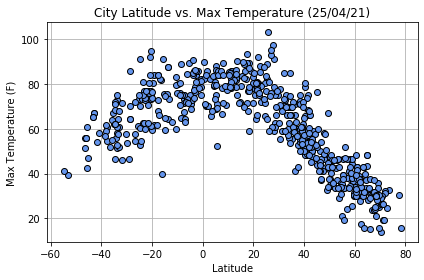

In [11]:
plt.title("City Latitude vs. Max Temperature (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Max Temp"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/01_Latitude_vs_temperature_plot.png")
plt.show()


## Latitude vs. Humidity Plot

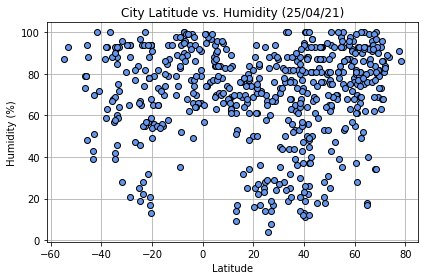

In [12]:
plt.title("City Latitude vs. Humidity (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Humidity"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/02_Latitude_vs_Humidity_plot.png")
plt.show()


## Latitude vs. Cloudiness Plot

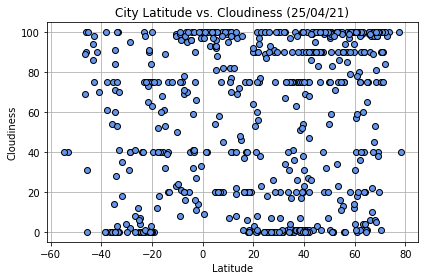

In [13]:
plt.title("City Latitude vs. Cloudiness (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Cloudiness"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/03_Latitude_vs_Cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

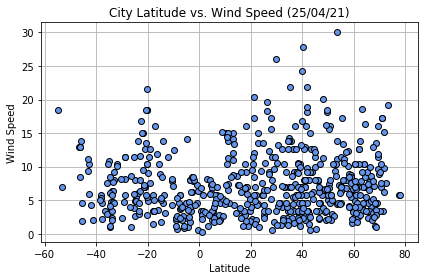

In [14]:
plt.title("City Latitude vs. Wind Speed (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Wind Speed"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/04_Latitude_vs_Wind Speed_plot.png")
plt.show()

## Linear Regression

In [15]:
#Using locs to divide Northern and Southern Hemispheres 

north = cities_complete.loc[cities_complete["Lat"]>0]
south = cities_complete.loc[cities_complete["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.89
The r-value is: -0.8901877205499885


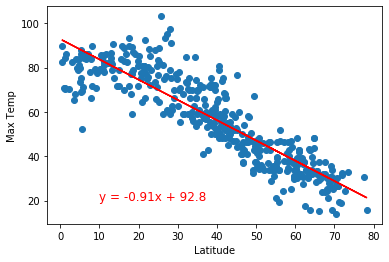

In [16]:
x_values = north["Lat"]
y_values = north["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/05_North_Regression_Latitude_vs_MaxTemp_plot.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.65
The r-value is: 0.6458244164809887


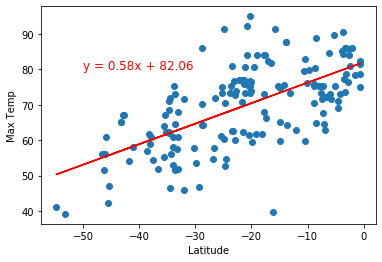

In [17]:
x_values = south["Lat"]
y_values = south["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/06_South_Regression_Latitude_vs_MaxTemp_plot.png")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15
The r-value is: 0.14839039638232654


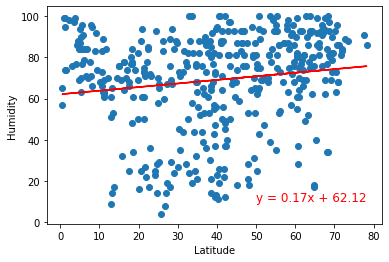

In [18]:
x_values = north["Lat"]
y_values = north["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/07_North_Regression_Latitude_vs_Humidity_plot.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
The r-value is: 0.12683663362591183


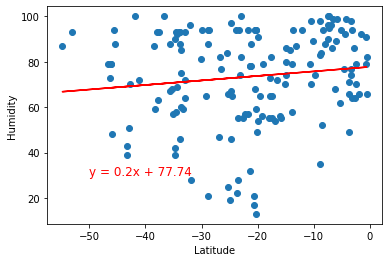

In [19]:
x_values = south["Lat"]
y_values = south["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/08_South_Regression_Latitude_vs_Humidity_plot.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1
The r-value is: 0.09717756788884342


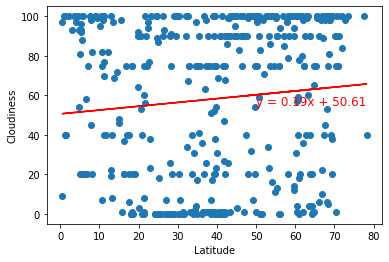

In [20]:
x_values = north["Lat"]
y_values = north["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,55),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/09_North_Regression_Latitude_vs_Cloudiness_plot.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.12
The r-value is: 0.11884013513441799


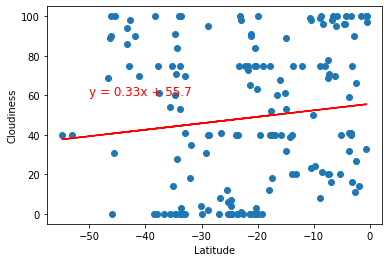

In [21]:
x_values = south["Lat"]
y_values = south["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/010_South_Regression_Latitude_vs_Cloudiness_plot.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.09
The r-value is: 0.08821043362364173


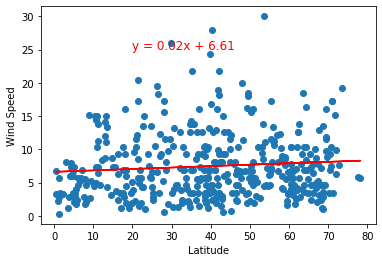

In [22]:
x_values = north["Lat"]
y_values = north["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/11_North_Regression_Latitude_vs_WindSpeed_plot.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.2
The r-value is: -0.19658566624967355


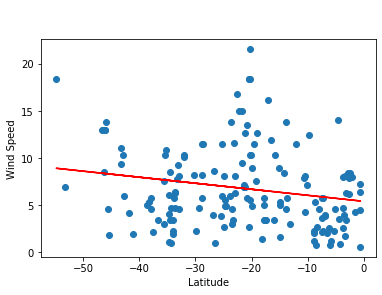

In [23]:
x_values = south["Lat"]
y_values = south["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/12_South_Regression_Latitude_vs_WindSpeed_plot.png")
plt.show()
